# The Ladybug Clock Puzzle

**Problem:** A ladybug starts at 12 o'clock on a clock face. It randomly walks clockwise or counterclockwise (Brownian motion). Which hour position is most likely to be visited **last**?

**Hypothesis:** Position 6 (opposite the start) is most likely to be last. Positions 1 and 11 (adjacent to start) are least likely.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
result_freq = np.zeros(13, dtype=np.int32)

for sim in range(100000):

    # CREATE RANDOM STEPS
    steps = np.random.choice([-1, 1], 1000)

    # DETERMINE POSITION AT EACH TIME STEP
    hours = np.cumsum(steps) % 12
    hours[hours == 0] = 12

    # FIND WHEN EACH HOUR WAS FIRST VISITED
    first_visit = {12: -1}

    for hour in range(1, 12):
        # FIND FIRST OCCURRENCE FOR EACH HOUR
        first_visit[hour] = (hours == hour).argmax() # keep a high step size!

    # THE HOUR VISITED LAST WILL HAVE THE HIGHEST INDEX IN THE DICTIONARY
    last_hour = max(first_visit, key=first_visit.get)

    # UPDATE RESULT
    result_freq[last_hour] += 1

In [26]:
for hour in range(1, 13):
    prob = result_freq[hour] / result_freq[1:].sum()
    print(f"{hour:4}    {prob:6.2%} {"|" * int(prob * 100)}")

   1     8.98% ||||||||
   2     9.00% ||||||||
   3     9.06% |||||||||
   4     9.06% |||||||||
   5     9.12% |||||||||
   6     9.24% |||||||||
   7     9.05% |||||||||
   8     9.01% |||||||||
   9     9.19% |||||||||
  10     9.35% |||||||||
  11     8.95% ||||||||
  12     0.00% 


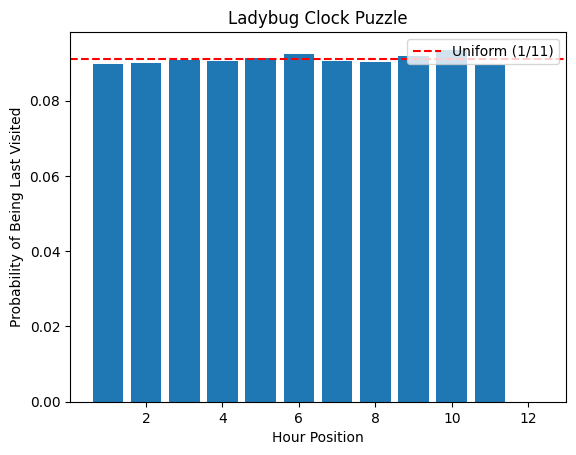

In [25]:
hours = list(range(1, 13))
probs = [result_freq[h] / result_freq[1:].sum() for h in hours]

plt.bar(hours, probs)
plt.xlabel('Hour Position')
plt.ylabel('Probability of Being Last Visited')
plt.title('Ladybug Clock Puzzle')
plt.axhline(y=1/11, color='red', linestyle='--', label='Uniform (1/11)') # REFERENCE LINE
plt.legend()
plt.show()